# IBM and Coursera "Machine Learning Fundamentals"
## __Final Course Project:__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")
%matplotlib inline

## 1. Importing and Describing the Data

For my project, I am using the well-known [Boston Housing dataset](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).
This dataset was originally collected by US Census Service, and first analyzed by D. Harrison and D.L. Rubinfeld in their paper called _'Hedonic prices and the demand for clean air'_ in the Journal for Environmental Economics & Management from 1978.
The dataset consist of 14 variables and 506 rows of observations that correspond to so-called 'towns', i.e. various subsections of Boston.
Table 1 shows the description of the variables that come with dataset on [Kaggle](https://www.kaggle.com/canaldaciencia/the-boston-housing-dataset).
The variables can be grouped into three groups: housing-related, social-related, and industry-related.
The biggest group are housing-realted variables such as average number of rooms per dwelling (RM), the propotion of owener-occupied units built prior to 1940 (AGE), or the median value of onwer-occupied homes (MEDV).
Under the group of social-related variables fall LSTAT, i.e. % of lower status of the population, or CRIM, i.e. per capita crime rate by town.
The industry-related variables include INDUS, which is the propotion of non-retail business acres per town, or NOX, the nitric oxides concentration.
The dataset's associated task is to peform regression analysis using either MEDV or NOX as target, while the other 13 variables would be used as features respectively.
In the following sections, I will prepare the dataset with goal to using MEDV as target and the other variables as features, for predicting median housing prices. 


|Attribute Name| Description|
|:----|:----|
|CRIM|per capita crime rate by town|
|ZN|proportion of residential land zoned for lots over 25,000 sq.ft.|
|INDUS|proportion of non-retail business acres per town|
|CHAS|Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)|
|NOX|nitric oxides concentration (parts per 10 million)|
|RM|average number of rooms per dwelling|
|AGE|proportion of owner-occupied units built prior to 1940|
|DIS|weighted distances to five Boston employment centres|
|RAD|index of accessibility to radial highways|
|TAX|full-value property-tax rate per USD 10,000|
|PTRATIO|pupil-teacher ratio by town|
|B|1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town|
|LSTAT|% lower status of the population|
|MEDV|Median value of owner-occupied homes in USD 1000's|

## 2. Plan for Exploratory Data Analysis
Before any dataset can be used for machine learning or data mining, prior steps must be taken to inspect the dataset's quality and explore it for preliminary insights.
After importing any dataset, it should be checked for quality and completeness.
Data cleaning entails checking:
* if the variables are correctly labelled
* if the data is in the correct data type and format
* for duplicates and/or missing values
* for outliers
* the distributions of features

Feature extraction and engineering consists:
* identifying the features best to predict the target
* scaling numerical features (if necessary)
* encoding categorical features (if necessary)


## 3. Data Cleaning, Feature Engineering, and their Results
### 3.1 Data Cleaning and Quality Check
The data cleaning and quality checking should utilze the dataset's description as guidelines.
After importing the dataset, I checked whether all variables are in numerical format, if they have missing or duplicate values.
Image 1 shows fortunately all variables have been correctly imported as float type, and possess neither duplicate nor missing values.
Table 2 shows the descriptive statistics for the dataset, which can used to check if all variables confirm to there description.
Features that are described as expressing a proportion, such ZN, INDUS, AGE, and LSTAT, should only range between 0.0 and 100.0. Table 2 shows that is correct.
Moreover, the Boston Housing descriptions tells us that the MEDV target was capped at USD 50,000 by the creators of the dataset. Indeed, Table 2 confirms the values is capped at 50.
The CHAS, Charles River dummy variable, can only take on the value 1 if the tract touches with Charles River and 0 if not, as confirmed by Table 2 (quartile, mean, standard deviation, are useless for this feature).
RM, DIS, RAD, TAX, and PTRATIO show no salient problems so far.

The descriptive statistice also hint at the fact that some variables may be very skewed.
Obtaining the percentage of outliers and plotting boxplot diagrams (Image 2) for all variables revealed that CRIM, ZN, and B are the top 3 most skewed variables, but also MEDV has a long tail towards high priced houses.
Given the small size of the dataset, with only 506 rows, I have decided against dropping the outliers and address in the feature engineering section again (through scaling).

To have closer look at the distribution of each variable histogram-and-distribution plot can be created for each (Image 3).
The histograms reveal that variables INDUS, CHAS, RAD, and TAX have a bimodal distribution, and that CRIM, ZN, & B have highly skewed distributions.
Except for the CHAS dummy variable, it may be helpful to normalize skewed or bimodal features via log transformation.

### 3.2 Feature Engineering
It should also be acknowledged that the feature B has already undergone some feature engineering. As the description tells us $B=1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town. This transformation was motivated by economic considerations by authors of the original paper. They expected both a high and low proportion of African-American dwellers in town to correlate with high housing prices as a form of market discrimination against blacks. However, a scatter plot reveals a problem of increasing heteroscedacity, which means as the proportion of African-American dwellers increases so does the variation in housing prices. Since the original feature, i.e. proportion of black dwellers cannot easily be recovered, this feature will be dropped.

In order to address the problems of skewness and outliers, I have applied logarithimic transformation to CRIM and ZN, the most skewed features.
After, this I have applied a min-max scaler to all features excluding the CHAS dummy variable (as it expresses a category not a continuous range of numbers). Now all features have a range from 0 to 1, and should be able to send a clear signal to the ML regression algorithm.

## 4. Hypothesis and Feature Selection
In this section, I will hypothesize and test the direction of the relationship between a few selected features and the target. For linear regression, features are often selected as predictors that have strong and signficant correlation with the target.
For the sake of brevity, I will pick one feature from each of the three groups that I defined earlier: housing-related, social-related, and industry-related.
From the housing-related, I choose RM (average number of rooms) and assume that it correlates positively with MEDV (at p<0.05) because as the number of rooms goes so should the median prices for the house.
For social-related, I pick LSTAT (% of lower status) and propose that it has a negative correlation with MEDV (at p<0.05) because the lower income situation in town, the less likely people can afford to buy houses or maintain pricy houses.
For the last group, I choose INDUS and assume that it also has a negative correlation with MEDV because the bigger the proportion of industry in a town, the less attractive it is for home-owners.

$H_0$: The effects between RM, LSTAT, INDUS and MEDV respectively are due to random chance.

$H_1$: The feature RM is positively correlated with MEDV.

$H_2$: The feature LSTAT is negatively correlated with MEDV.

$H_3$: The feature INDUS is negatively correlated with MEDV.

Table shows the Pearson correlation coefficient of each feature with the target, the p-value of the correlation, and whether the relationship is significant at the 95% confidence level.
I can reject the null hypothesis the relations between those features and the target are due to chance.
The correlation for RM and MEDV is 0.70, which is positive and strong, confirming my $H_1$ hypothesis.
LSTAT and MEDV have a coefficient of -0.74, which is a strong negative relationship and also significant in line $H_2$.
The correlation coefficient between INDUS and MEDV is r=-0.48. The relationship is not as strong as between RM and MEDV but still significant to confirm $H_3$.

## 5. Suggestions for Further Analysis
As mentioned in the beginning, the goal associated with the Boston Housing dataset is housing price prediction.
A common way of predicting a continuous target from multiple features is Multiple Linear Regression analysis (MLR).
For feature selection in MLR, it is not only to check the correlation of each feature against the target but also of the features against one another to identify multicollinearity.
Image shows a correlation of all features to help identify potential multicollinearity.
It reveals that, for instance CRIM is strongly, positively correlated with TAX and RAD; and that TAX and RAD have strong positive correlation.
Features pairs with a strong negative correlation are DIS and INDUS; and DIS and NOX.
As multicollinearity may bias the coefficients and their significance to the model in MLR, another approach would be perform a Lasso Regression.
Furthermore, a large number of features may make the model unnecessarily complex without helping accuracy.
A Lasso Regression can reduce the complexity of the model by reducing the number of coefficients and may also increase the model's accuracy.
In the end, the model may require only a few features to accurately predict housing prices in Boston.

## 6. Quality of the Dataset and Desirable Features
There are some merits and demerots about the quality of the Boston Housing dataset.
The merits include that the dataset comes without missing values or duplicate entries, which sped up the data cleaning process.
The dataset is clearly summarized from larger set of data about Boston, in order to obtain median and mean values for various variables.
It would be helpful in addition to the median price of houses, there would also be the mean price of houses.
The same holds true for the RM variable, where in addition to average number of rooms also the median number of rooms could be useful.
If the dataset is used to predict housing prices from social features, the original features about the proportion of African-American dwellers should have been kept alongside the transformed feature.
If the dataset would be used about air quality testing, it may be useful to have more variables on emission gasses not just NOX and about transport.
Finally, position in form longitute and latitude may be useful features for both air quality and housing price predictions.  

In [2]:
from sklearn import datasets
boston= datasets.load_boston()
x_boston, y_boston = boston.data, boston.target
print('Dimensions:', x_boston.shape, y_boston.shape)

Dimensions: (506, 13) (506,)


In [3]:
print('Keys:', boston.keys())
print('Feature Names:', boston.feature_names)
print(boston.DESCR)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Feature Names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances 

### Importing the Dataset

In [4]:
# putting the dataset into a Pandas DataFrame
df_boston= pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['MEDV']= boston.target
df_boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [5]:
df_boston['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

### Checking for Missing Values

In [6]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Checking for Duplicates

In [8]:
df_boston[df_boston.duplicated()== True]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


### Summary Statistics for the Dataset

In [9]:
# obtain descriptive stats
descr_data = df_boston.describe()
descr_data.loc["range"] = descr_data.loc['max'] - descr_data.loc['min']
descr_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000
range,88.969880,100.000000,27.280000,1.000000,0.486000,5.219000,97.100000,10.996900,23.000000,524.000000,9.400000,396.580000,36.240000,45.000000


### Finding Outliers

In [10]:
# find outliers by computation of IQR
for k, v in df_boston.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df_boston)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


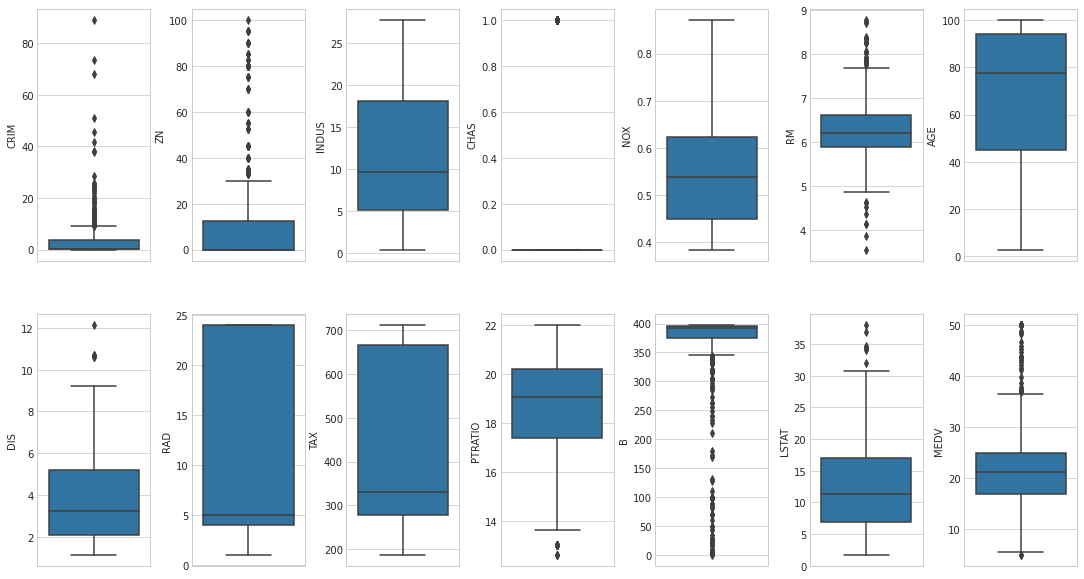

In [11]:
# find outliers with boxplot outliers
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(15, 8))
ind = 0
axs = axs.flatten()
for k,v in df_boston.items():
    sns.boxplot(y=k, data=df_boston, ax=axs[ind])
    ind += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0);

### Finding Distributions

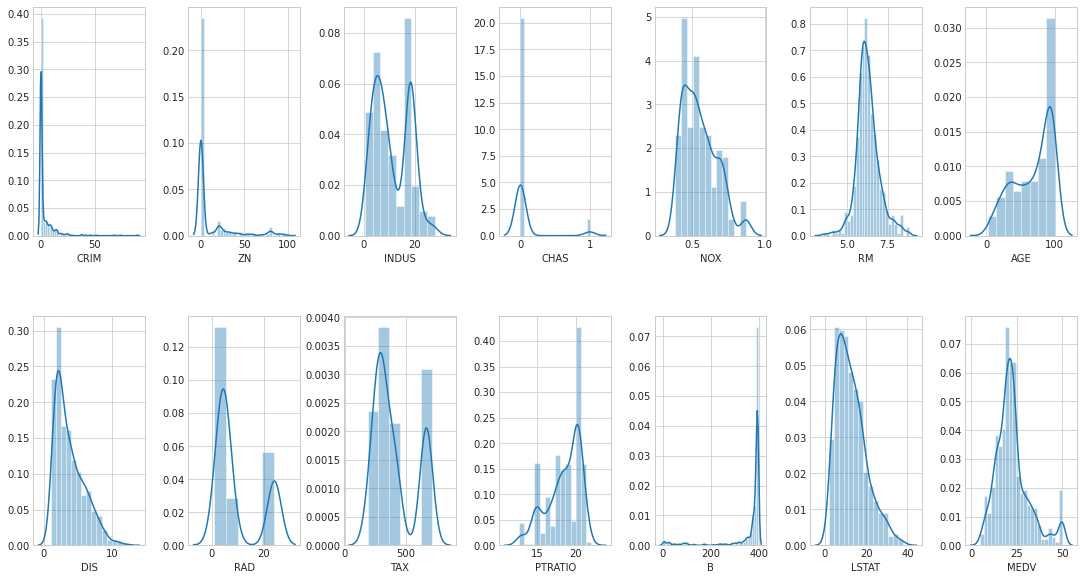

In [12]:
# plot histograms
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(15, 8))
ind = 0
axs = axs.flatten()
for k,v in df_boston.items():
    sns.distplot(v, ax=axs[ind])
    ind += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

### Feature Engineering

__Black Feature has already been transformed and suffers heteroscedasticity__

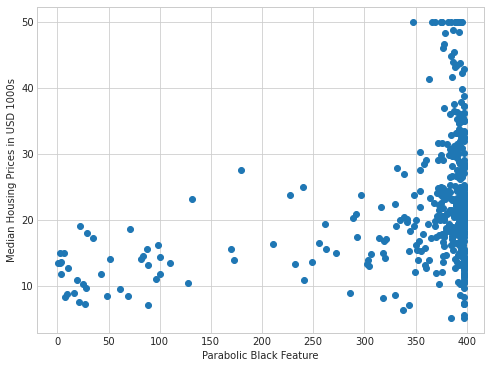

In [13]:
plt.figure(figsize=(8,6))
plt.scatter((df_boston['B']),df_boston['MEDV'])
plt.xlabel('Parabolic Black Feature')
plt.ylabel('Median Housing Prices in USD 1000s');

In [14]:
df_feature = df_boston.drop(['B','MEDV'],axis=1).copy()
df_feature.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT'],
      dtype='object')

__Log transforming skewed features and min-max scaling all features__

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_feature[['CRIM']] = np.log1p(df_feature[['CRIM']].to_numpy())
df_feature[['ZN']] = np.log1p(df_feature[['ZN']].to_numpy())
df_feature[['CRIM','ZN','INDUS', 'NOX', 'RM','AGE',
            'DIS','RAD', 'TAX','PTRATIO','LSTAT']] = scaler.fit_transform(df_feature[['CRIM','ZN','INDUS','NOX','RM','AGE',
                                                                                      'DIS','RAD','TAX','PTRATIO','LSTAT']].to_numpy())
df_feature.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.179629,0.206684,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.301409
std,0.227615,0.351200,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.016147,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.144040
50%,0.049415,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.265728
75%,0.341930,0.563948,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Hypothesis Testing and Correlation

In [16]:
from scipy.stats import pearsonr
df_feature['MEDV']= df_boston['MEDV'].values
corr= []
p_value= []
for col in df_feature.columns:
    r= pearsonr(np.array(df_feature[col]), np.array(df_feature.MEDV))
    corr.append(r[0])
    p_value.append(r[1])
p_value = np.array(p_value)
sign = p_value<= 0.05
corr_table = pd.DataFrame(np.round(corr,2),columns=['Correlation with MEDV'],index=df_feature.columns)
corr_table['p-values']=np.round(p_value,5)
corr_table['Significant']=sign
corr_table

,Correlation with MEDV,p-values,Significant
CRIM,-0.46,0.00000,True
ZN,0.38,0.00000,True
INDUS,-0.48,0.00000,True
CHAS,0.18,0.00007,True
NOX,-0.43,0.00000,True
RM,0.70,0.00000,True
AGE,-0.38,0.00000,True
DIS,0.25,0.00000,True
RAD,-0.38,0.00000,True
TAX,-0.47,0.00000,True


### Correlation Matrix for all Features

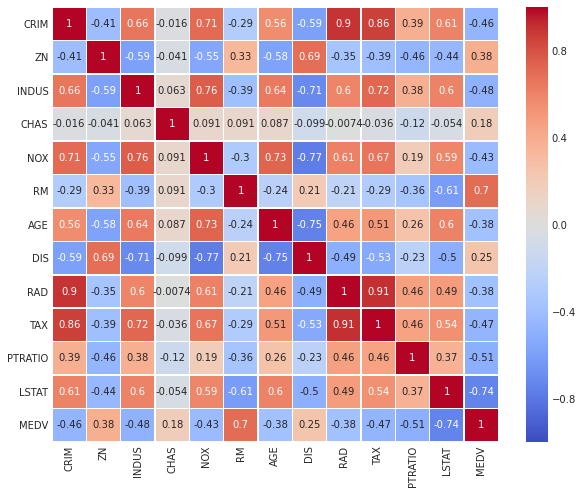

In [17]:
# find correlation between features and target
plt.figure(figsize=(10,8))
sns.heatmap(df_feature.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=.5);